In [73]:
import numpy as np
import pandas as pd
import stat1
import plot
import nsfg1
import distributions
import matplotlib.pyplot as plt
import resp_nsfg1
import resp_nsfg_2
import resp_stat1
import resp_stat_2

In [74]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


Given a list of values, there are several ways to count the frequency of each value.

In [75]:
t = [1, 2, 2, 3, 5]

By using a Python dictionary:

In [76]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

Use a `Counter` (which is a dictionary with additional methods):

In [77]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Use the `Hist` object provided by `stat1`:

In [78]:
hist = stat1.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [79]:
hist.freq(2)

2

Use the bracket operator, which does the same thing.

In [80]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [81]:
hist[4]

0

The `Values` method returns the values:

In [82]:
hist.values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [83]:
for val in sorted(hist.values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Use the `items` method:

In [84]:
for val, freq in hist.items():
     print(val, freq)

1 1
2 2
3 1
5 1


`plot` is a wrapper for `matplotlib` that provides functions that work with the objects in `stat1`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


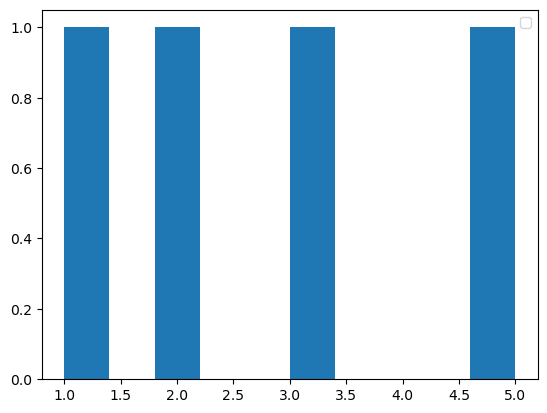

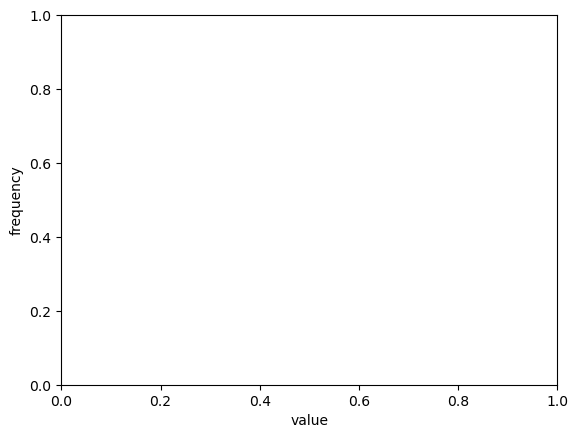

In [85]:
plot.Hist(hist)
plot.Config(xlabel='value', ylabel='frequency')

Load the pregnancy file:

In [86]:
preg = nsfg1.read_fem_preg()
print(preg)

      caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0      60418         1        NaN        NaN       NaN       NaN       5.0   
1      60418         2        NaN        NaN       NaN       NaN       5.0   
2      60418         3        NaN        NaN       NaN       NaN       5.0   
3      60419         1       33.0        1.0       8.0       NaN       NaN   
4      60420         1        NaN        NaN       NaN       NaN       6.0   
...      ...       ...        ...        ...       ...       ...       ...   
9353   70615         3        NaN        NaN       NaN       NaN       6.0   
9354   70616         1        NaN        NaN       NaN       NaN       5.0   
9355   70616         2        NaN        NaN       NaN       NaN       5.0   
9356   70619         1        NaN        NaN       NaN       NaN       6.0   
9357   70619         2        NaN        NaN       NaN       NaN       5.0   

      pregend2  howenddk  nbrnaliv  ...  cmintvw  cmlstyr  cmja

In [87]:
preg = nsfg1.read_fem_preg()

# Filter live births
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

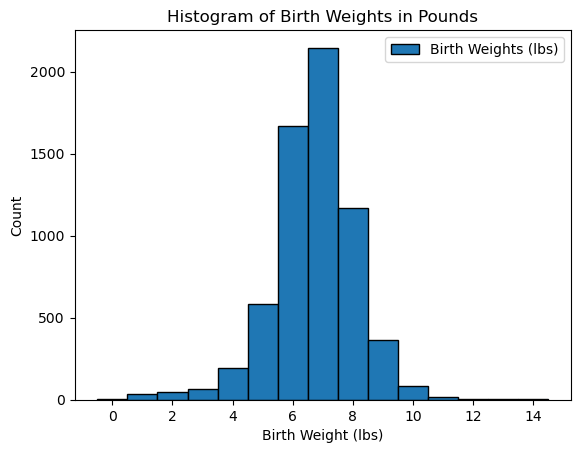

In [88]:
# Plot histogram of birth weights
plt.hist(live['birthwgt_lb1'], bins=range(0, 16), align='left', edgecolor='black', label='Birth Weights (lbs)')
plt.xlabel('Birth Weight (lbs)')
plt.ylabel('Count')
plt.title('Histogram of Birth Weights in Pounds')
plt.legend()

Before plotting the ages, I'll apply `floor` to round down:

In [89]:
ages = np.floor(live.agepreg)

Plot the histogram of column `agepreg'.

[nan 28. 31. 26. 19. 25. 30. 14. 18. 17. 20. 16. 21. 22. 99. 23. 32. 33.
 34. 29. 38. 98. 24. 15. 36. 27. 39. 35. 37.]


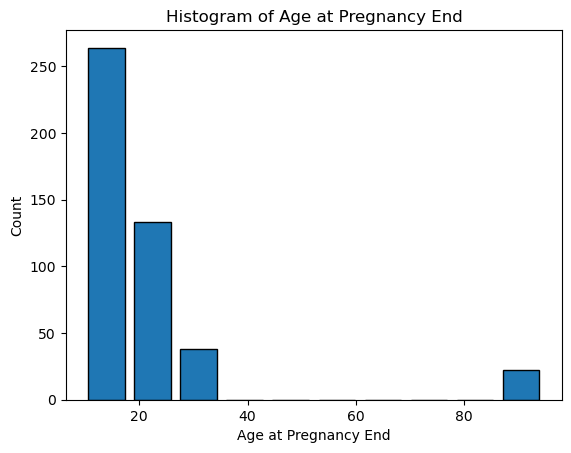

In [90]:
# Check unique values in 'ageatend'
print(preg['ageatend'].unique())

# Recode the variable AGEPREG
preg['AGEPREG'] = preg['ageatend'].replace({
    0: 'Inapplicable',
    174: 'Under 20 years',
    138: '20-24 years',
    72: '25-29 years',
    51: '30-44 years',
    98: 'Refused',
    99: "Don't know"
})

# Convert 'ageatend' to numeric, ignoring errors to handle non-numeric values
preg['ageatend'] = pd.to_numeric(preg['ageatend'], errors='coerce')

# Plot histogram of AGEPREG
plt.hist(preg['ageatend'].dropna(), align='left', edgecolor='black', rwidth=0.8)
plt.xlabel('Age at Pregnancy End')
plt.ylabel('Count')
plt.title('Histogram of Age at Pregnancy End')
plt.show()

Plot the histogram of pregnancy lengths (column `prglngth`).

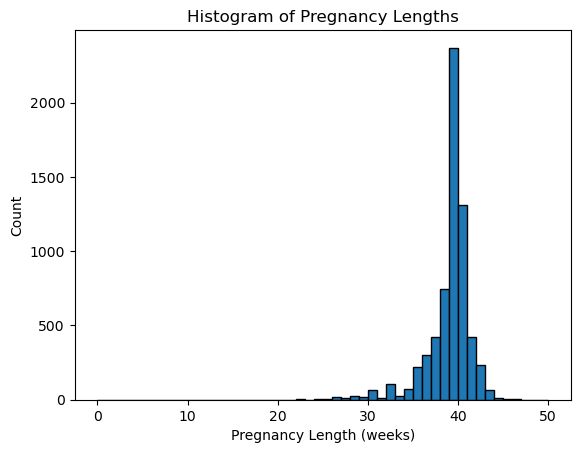

In [91]:
# Plot histogram of pregnancy lengths
plt.hist(live['prglngth'], bins=range(0, 51, 1), edgecolor='black')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Count')
plt.title('Histogram of Pregnancy Lengths')
plt.show()

Plot the histogram of column `birthwgt_oz1'.

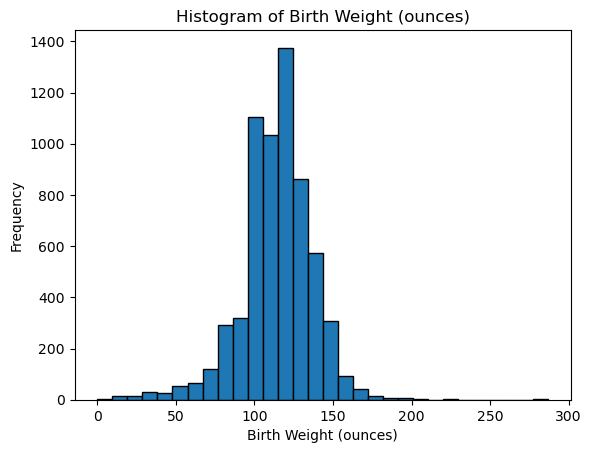

In [92]:
# Filter the data based on the specified conditions
filtered_data = live[(live['prgoutcome'] == 1) & (live['birthwgt_oz1'].notna())]

# Use .loc to avoid the SettingWithCopyWarning
filtered_data.loc[:, 'birthwgt_oz1'] = filtered_data['birthwgt_lb1'] * 16 + filtered_data['birthwgt_oz1']

# Plot the histogram
plt.hist(filtered_data['birthwgt_oz1'], bins=30, edgecolor='black')
plt.title('Histogram of Birth Weight (ounces)')
plt.xlabel('Birth Weight (ounces)')
plt.ylabel('Frequency')
plt.show()

`Hist` provides smallest, which select the lowest values and their frequencies.

In [93]:
for weeks, freq in hist.smallest(10):
    print(weeks, freq)

1 1
2 2
3 1
5 1


Use `Largest` to display the longest pregnancy lengths.

In [94]:
for weeks, freq in hist.largest(10):
    print(weeks, freq)

5 1
3 1
2 2
1 1


From live births, select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

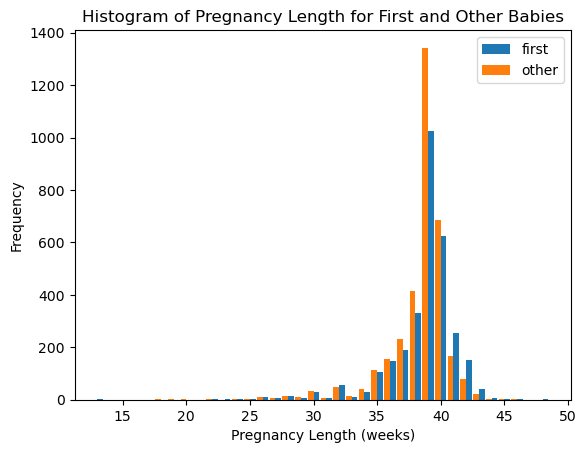

In [95]:
# Select first babies using 'birthord'
firsts = live[live.birthord == 1]

# Select others (non-first babies) using 'birthord'
others = live[live.birthord != 1]

# Compute histograms of pregnancy length for the two groups
first_hist = stat1.Hist(firsts.prglngth, label='first')
other_hist = stat1.Hist(others.prglngth, label='other')

# Get bins and counts for the histograms
first_bins, first_counts = zip(*sorted(first_hist.items()))
other_bins, other_counts = zip(*sorted(other_hist.items()))

# Plot the histograms using matplotlib
width = 0.45
plt.bar(first_bins, first_counts, align='edge', width=width, label='first')
plt.bar(other_bins, other_counts, align='edge', width=-width, label='other')

# Set labels and title
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancy Length for First and Other Babies')

# Show the legend
plt.legend()

# Show the plot
plt.show()


We can use `width` and `align` to plot two histograms side-by-side.

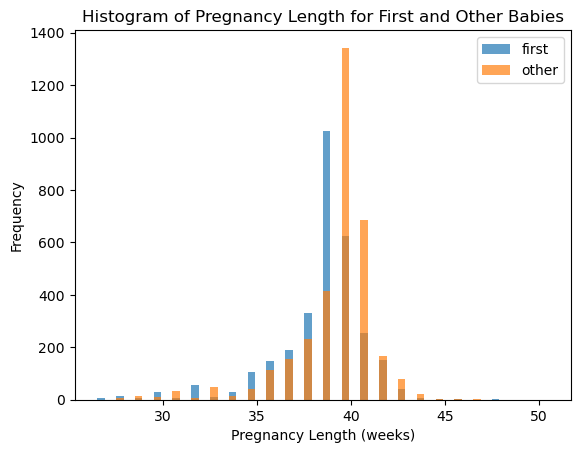

In [96]:
# Select first babies using 'birthord'
firsts = live[live.birthord == 1]

# Select others (non-first babies) using 'birthord'
others = live[live.birthord != 1]

# Compute histograms of pregnancy length for the two groups
first_hist = stat1.Hist(firsts.prglngth, label='first')
other_hist = stat1.Hist(others.prglngth, label='other')

# Set bin edges
bin_edges = range(27, 51)  # Assuming pregnancy lengths are in the range 27 to 50 weeks

# Plot the histograms side-by-side
width = 0.4
plt.hist(firsts.prglngth, bins=bin_edges, align='left', width=width, label='first', alpha=0.7)
plt.hist(others.prglngth, bins=bin_edges, align='right', width=width, label='other', alpha=0.7)

# Set labels and title
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Frequency')
plt.title('Histogram of Pregnancy Length for First and Other Babies')

# Show the legend
plt.legend()

# Show the plot
plt.show()


`Series` provides methods to compute summary statistics:

In [97]:
# Load data and create the 'live' DataFrame
live, firsts, others = distributions.MakeFrames()

# Now you can calculate mean, variance, and std
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()


Here are the mean and standard deviation:

In [98]:
mean, std

(38.464632454923716, 2.6413823874690654)

Confirm that `std` is the square root of `var`:

In [99]:
# Assuming you have already calculated mean, var, and std
calculated_std = var**0.5

# Check if calculated_std is equal to std
assert calculated_std == std, "The relationship std = sqrt(var) holds."


Here's are the mean pregnancy lengths for first babies and others:

In [100]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.57124225627649, 38.36908240794857)

And here's the difference (in weeks):

In [101]:
firsts.prglngth.mean() - others.prglngth.mean()

0.20215984832792344

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [102]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [103]:
# Assuming you have separate DataFrames for first babies and others
first_babies = live[live.birthord == 1]
others = live[live.birthord > 1]

# Compute Cohen effect size
cohen_effect_size = CohenEffectSize(first_babies.prglngth, others.prglngth)

print("Cohen's effect size for pregnancy length between first babies and others:", cohen_effect_size)

Cohen's effect size for pregnancy length between first babies and others: 0.07658562142198887


Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

In [104]:
first_babies = live[live.birthord == 1]
others = live[live.birthord > 1]

# Calculate mean birth weight for first babies and others
mean_first_babies = first_babies.totalwgt_lb1.mean()
mean_others = others.totalwgt_lb1.mean()

print("Mean birth weight for first babies:", mean_first_babies)
print("Mean birth weight for others:", mean_others)

Mean birth weight for first babies: 7.069620253164557
Mean birth weight for others: 7.166958693707128


Load the respondent file:

In [105]:
resp = nsfg1.read_fem_resp()
print(resp)

Length of DataFrame in read_fem_resp: 5699
      caseid  rscrninf  rscrage  rscrhisp  rscrrace  age_a  age_r  cmbirth  \
0      60418         5       38         5         5     38     38      921   
1      60419         5       37         5         5     37     37      942   
2      60420         5       35         5         4     33     33      981   
3      60423         1       31         5         4     31     31     1010   
4      60426         5       39         5         5     39     39      897   
...      ...       ...      ...       ...       ...    ...    ...      ...   
5694   70614         1       35         1         6     35     35      947   
5695   70615         1       20         1         6     20     20     1120   
5696   70616         1       40         1         6     40     40      895   
5697   70619         1       43         5         5     43     43      855   
5698   70620         5       17         5         4     18     18     1160   

      agescrn  marst

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf)

In [106]:
resp.head()

,caseid,rscrninf,rscrage,rscrhisp,rscrrace,age_a,age_r,cmbirth,agescrn,marstat,...,sest,cmintvw,cmlstyr,cmjan3yr,cmjan4yr,cmjan5yr,quarter,phase,intvwyear,intvlngth
0,60418,5,38,5,5,38,38,921,38,2,...,342,1381,1369,1345,1333,1321,14,1,2015,112.7
1,60419,5,37,5,5,37,37,942,37,2,...,318,1388,1376,1345,1333,1321,16,1,2015,80.0
2,60420,5,35,5,4,33,33,981,33,6,...,339,1388,1376,1345,1333,1321,16,1,2015,65.0
3,60423,1,31,5,4,31,31,1010,31,6,...,355,1387,1375,1345,1333,1321,16,1,2015,65.7
4,60426,5,39,5,5,39,39,897,39,1,...,344,1368,1356,1321,1309,1297,9,1,2013,51.6


In [107]:
# Print the column names of the DataFrame
resp.columns

Index(['caseid', 'rscrninf', 'rscrage', 'rscrhisp', 'rscrrace', 'age_a',
       'age_r', 'cmbirth', 'agescrn', 'marstat',
       ...
       'sest', 'cmintvw', 'cmlstyr', 'cmjan3yr', 'cmjan4yr', 'cmjan5yr',
       'quarter', 'phase', 'intvwyear', 'intvlngth'],
      dtype='object', length=3207)

In [108]:
# Print the full list of column names
print(resp.columns.tolist())

['caseid', 'rscrninf', 'rscrage', 'rscrhisp', 'rscrrace', 'age_a', 'age_r', 'cmbirth', 'agescrn', 'marstat', 'fmarstat', 'fmarit', 'evrmarry', 'hisp', 'hispgrp', 'primlang1', 'primlang2', 'primlang3', 'roscnt', 'numchild', 'hhkids18', 'daught918', 'son918', 'nonbiokids', 'hplocale', 'manrel', 'goschol', 'vaca', 'higrade', 'compgrd', 'dipged', 'earnhs_m', 'earnhs_y', 'cmhsgrad', 'hischgrd', 'lstgrade', 'myschol_m', 'myschol_y', 'cmlstsch', 'havedeg', 'degrees', 'earnba_m', 'earnba_y', 'expschl', 'expgrade', 'cmbagrad', 'wthparnw', 'onown', 'onown18', 'intact', 'parmarr', 'intact18', 'lvsit14f', 'lvsit14m', 'womrasdu', 'momdegre', 'momworkd', 'momfstch', 'mom18', 'manrasdu', 'r_foster', 'evrfster', 'mnyfster', 'durfster', 'menarche', 'pregnowq', 'maybpreg', 'numpregs', 'everpreg', 'currpreg', 'howpreg_n', 'howpreg_p', 'nowprgdk', 'moscurrp', 'npregs_s', 'hasbabes', 'numbabes', 'nbabes_s', 'cmlastlb', 'cmlstprg', 'cmfstprg', 'cmpg1beg', 'nplaced', 'ndied', 'nadoptv', 'totplacd', 'otherkid

In [109]:
print(resp.totincr)

0        6
1        1
2       15
3        6
4       15
        ..
5694     9
5695     8
5696     5
5697    15
5698    15
Name: totincr, Length: 5699, dtype: int64


In [110]:
# Search for columns containing keywords related to income
income_columns = [col for col in resp.columns if 'totincr' in col.lower()]
# Print the found columns
print(income_columns)

['totincr', 'totincr_i']


([<matplotlib.axis.XTick at 0x1f519fae3d0>,
 [Text(1, 0, 'Under $5000'),
  Text(2, 0, '$5000-$7499'),
  Text(3, 0, '$7500-$9999'),
  Text(4, 0, '$10,000-$12,499'),
  Text(5, 0, '$12,500-$14,999'),
  Text(6, 0, '$15,000-$19,999'),
  Text(7, 0, '$20,000-$24,999'),
  Text(8, 0, '$25,000-$29,999'),
  Text(9, 0, '$30,000-$34,999'),
  Text(10, 0, '$35,000-$39,999'),
  Text(11, 0, '$40,000-$49,999'),
  Text(12, 0, '$50,000-$59,999'),
  Text(13, 0, '$60,000-$74,999'),
  Text(14, 0, '$75,000-$99,999'),
  Text(15, 0, '$100,000 or more')])

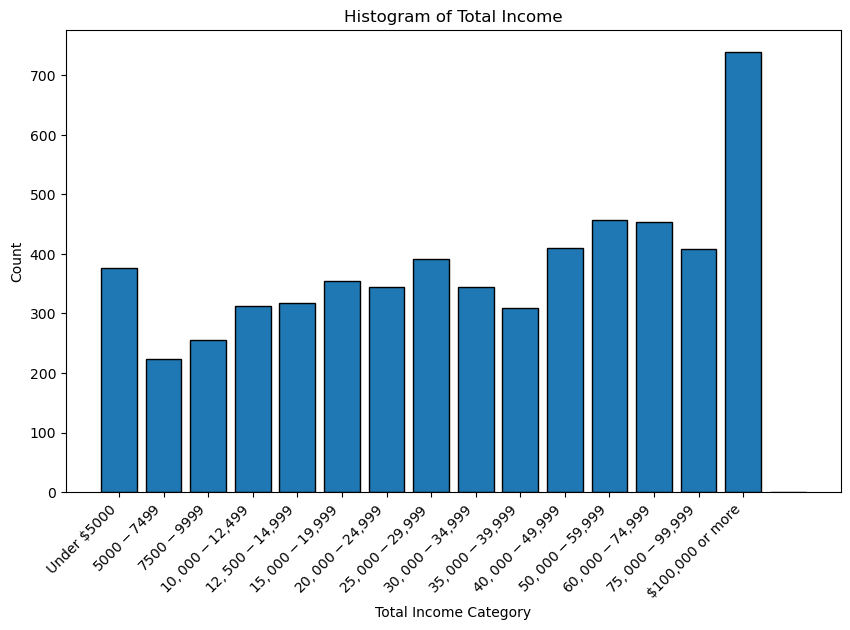

In [111]:
# Recode labels for better readability
income_labels = [
    'Under $5000',
    '$5000-$7499',
    '$7500-$9999',
    '$10,000-$12,499',
    '$12,500-$14,999',
    '$15,000-$19,999',
    '$20,000-$24,999',
    '$25,000-$29,999',
    '$30,000-$34,999',
    '$35,000-$39,999',
    '$40,000-$49,999',
    '$50,000-$59,999',
    '$60,000-$74,999',
    '$75,000-$99,999',
    '$100,000 or more'
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(resp['totincr'], bins=range(1, 18), align='left', edgecolor='black', rwidth=0.8)

# Customize plot
plt.xlabel('Total Income Category')
plt.ylabel('Count')
plt.title('Histogram of Total Income')
plt.xticks(range(1, 16), income_labels, rotation=45, ha='right')

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

([<matplotlib.axis.XTick at 0x1f522fc4160>,
 [Text(15, 0, '15 years'),
  Text(16, 0, '16 years'),
  Text(17, 0, '17 years'),
  Text(18, 0, '18 years'),
  Text(19, 0, '19 years'),
  Text(20, 0, '20 years'),
  Text(21, 0, '21 years'),
  Text(22, 0, '22 years'),
  Text(23, 0, '23 years'),
  Text(24, 0, '24 years'),
  Text(25, 0, '25 years'),
  Text(26, 0, '26 years'),
  Text(27, 0, '27 years'),
  Text(28, 0, '28 years'),
  Text(29, 0, '29 years'),
  Text(30, 0, '30 years'),
  Text(31, 0, '31 years'),
  Text(32, 0, '32 years'),
  Text(33, 0, '33 years'),
  Text(34, 0, '34 years'),
  Text(35, 0, '35 years'),
  Text(36, 0, '36 years'),
  Text(37, 0, '37 years'),
  Text(38, 0, '38 years'),
  Text(39, 0, '39 years'),
  Text(40, 0, '40 years'),
  Text(41, 0, '41 years'),
  Text(42, 0, '42 years'),
  Text(43, 0, '43 years'),
  Text(44, 0, '44 years'),
  Text(45, 0, '45 years')])

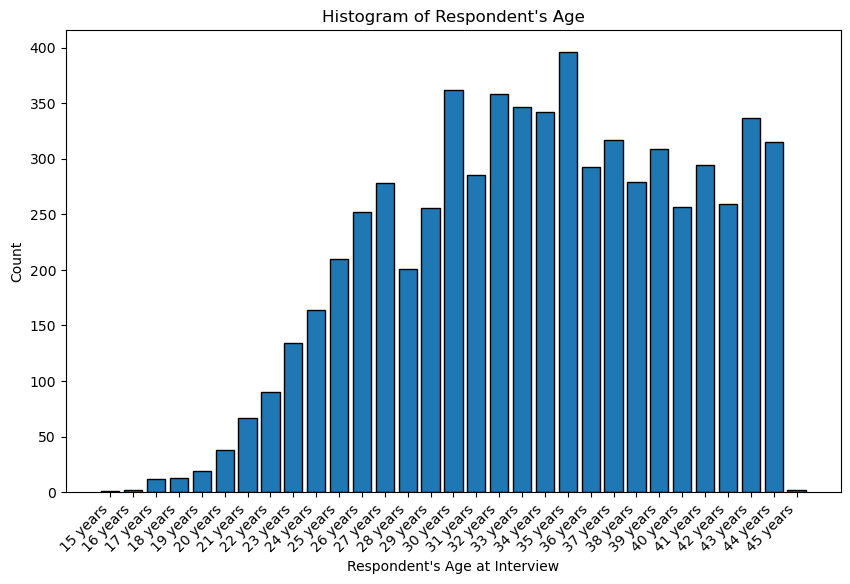

In [112]:
# Recode labels for better readability
age_labels = [
    '15 years', '16 years', '17 years', '18 years', '19 years',
    '20 years', '21 years', '22 years', '23 years', '24 years',
    '25 years', '26 years', '27 years', '28 years', '29 years',
    '30 years', '31 years', '32 years', '33 years', '34 years',
    '35 years', '36 years', '37 years', '38 years', '39 years',
    '40 years', '41 years', '42 years', '43 years', '44 years',
    '45 years'  # Added for completeness
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(live['ager'], bins=range(15, 47), align='left', edgecolor='black', rwidth=0.8)

# Customize plot
plt.xlabel("Respondent's Age at Interview")
plt.ylabel('Count')
plt.title('Histogram of Respondent\'s Age')
plt.xticks(range(15, 46), age_labels, rotation=45, ha='right')

PLot histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

([<matplotlib.axis.XTick at 0x1f522ee7340>,
 [Text(0, 0, 'No Family Members'),
  Text(1, 0, '1 Family Member'),
  Text(2, 0, '2 Family Members'),
  Text(3, 0, '3 Family Members'),
  Text(4, 0, '4 Family Members'),
  Text(5, 0, '5 Family Members'),
  Text(6, 0, '6 Family Members'),
  Text(7, 0, '7 Family Members or More')])

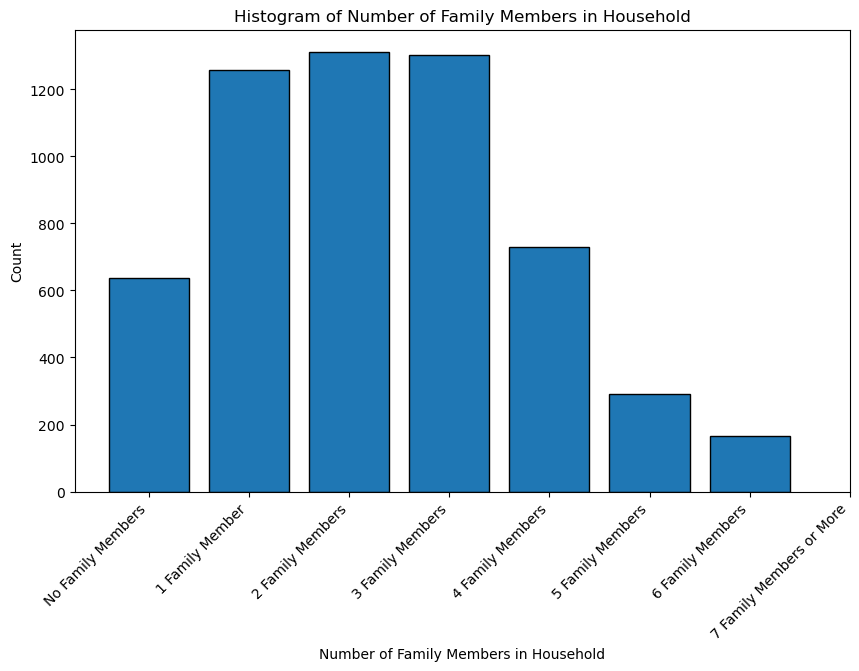

In [113]:
# Recode labels for better readability
numfmhh_labels = [
    'No Family Members', '1 Family Member', '2 Family Members',
    '3 Family Members', '4 Family Members', '5 Family Members',
    '6 Family Members', '7 Family Members or More'
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(resp['numfmhh'], bins=range(8), align='left', edgecolor='black', rwidth=0.8)

# Customize plot
plt.xlabel("Number of Family Members in Household")
plt.ylabel('Count')
plt.title('Histogram of Number of Family Members in Household')
plt.xticks(range(8), numfmhh_labels, rotation=45, ha='right')

Plot histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

([<matplotlib.axis.XTick at 0x1f52bbabd00>,
 [Text(0, 0, '0 Babies'),
  Text(1, 0, '1 Baby'),
  Text(2, 0, '2 Babies'),
  Text(3, 0, '3 Babies'),
  Text(4, 0, '4 Babies'),
  Text(5, 0, '5 or More Babies')])

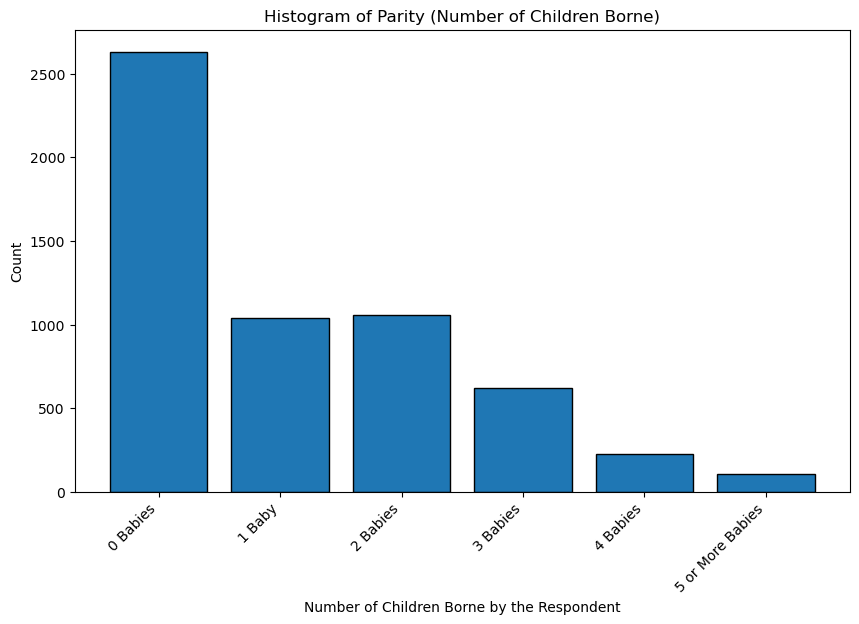

In [114]:
# Recode labels for better readability
parity_labels = ['0 Babies', '1 Baby', '2 Babies', '3 Babies', '4 Babies', '5 or More Babies']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(resp['parity'], bins=range(7), align='left', edgecolor='black', rwidth=0.8)

# Customize plot
plt.xlabel("Number of Children Borne by the Respondent")
plt.ylabel('Count')
plt.title('Histogram of Parity (Number of Children Borne)')
plt.xticks(range(6), parity_labels, rotation=45, ha='right')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [115]:
largest_parity = live['parity'].nlargest(10)
print(largest_parity)

3731    10
3732    10
3733    10
3734    10
3735    10
3736    10
3737    10
3738    10
3739    10
3740    10
Name: parity, dtype: int64


Insights :  Largest values of the parity variable in this dataset are all 10. This suggests that there are respondents who reported having 10 or more children

Let's investigate whether people with higher income have higher parity. In this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

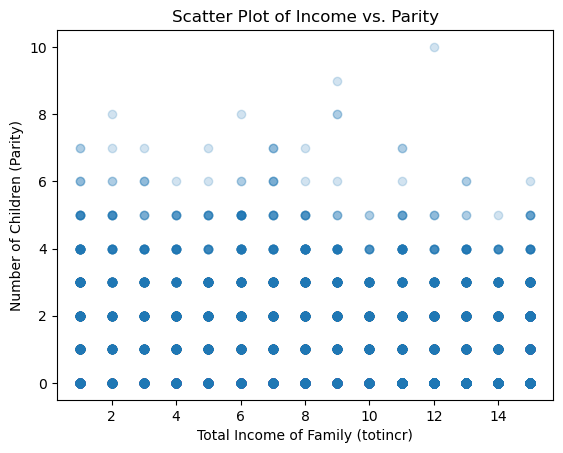

In [116]:
# Scatter plot of totincr vs. parity
plt.scatter(resp['totincr'], resp['parity'], alpha=0.2)
plt.xlabel('Total Income of Family (totincr)')
plt.ylabel('Number of Children (Parity)')
plt.title('Scatter Plot of Income vs. Parity')
plt.show()

Find the largest parities for high income respondents.

In [117]:
largest_parity = live['parity'].nlargest(10)
print(largest_parity)

3731    10
3732    10
3733    10
3734    10
3735    10
3736    10
3737    10
3738    10
3739    10
3740    10
Name: parity, dtype: int64


Compare the mean <tt>parity</tt> for high income respondents and others.

In [118]:
# Select high-income respondents
high_income = resp[resp['totincr'] == 14]

# Calculate mean parity for high-income respondents
mean_parity_high_income = high_income['parity'].mean()

# Calculate mean parity for other respondents
mean_parity_other = resp[resp['totincr'] != 14]['parity'].mean()

# Display mean parity for each group
print("Mean Parity for High-Income Respondents:", mean_parity_high_income)
print("Mean Parity for Other Respondents:", mean_parity_other)

Mean Parity for High-Income Respondents: 0.9093137254901961
Mean Parity for Other Respondents: 1.1770931770931772


Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

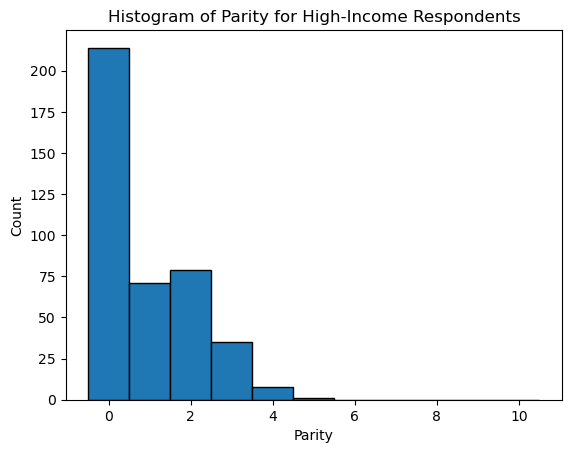

In [119]:
# Select high-income respondents
high_income = resp[resp['totincr'] == 14]

# Plot histogram of parity for high-income respondents
plt.hist(high_income['parity'], bins=range(12), align='left', edgecolor='black')
plt.xlabel('Parity')
plt.ylabel('Count')
plt.title('Histogram of Parity for High-Income Respondents')
plt.show()